In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import numpy as np

In [ ]:
# Load dataset

In [ ]:
file_path = "/mnt/data/mail_data.csv"

In [ ]:
df = pd.read_csv("mail_data.csv")


In [ ]:
# --- 1. Bar Graph: Spam vs Ham Count ---

In [ ]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<ipython-input-29-d744d7e8e2ea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Category"].value_counts().index, y=df["Category"].value_counts().values, palette="coolwarm")


<Axes: xlabel='Category'>

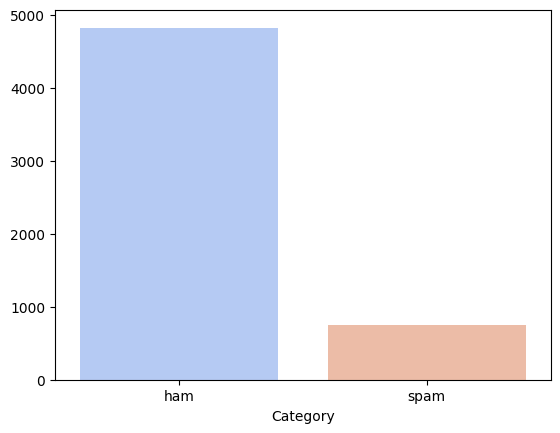

In [ ]:
sns.barplot(x=df["Category"].value_counts().index, y=df["Category"].value_counts().values, palette="coolwarm")

Text(0.5, 0, 'Email Category')

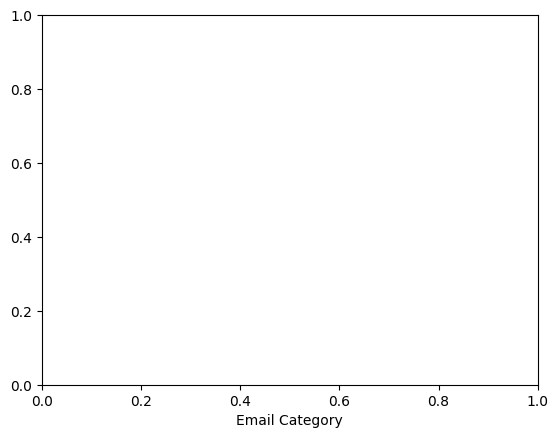

In [ ]:
plt.xlabel("Email Category")


Text(0, 0.5, 'Count')

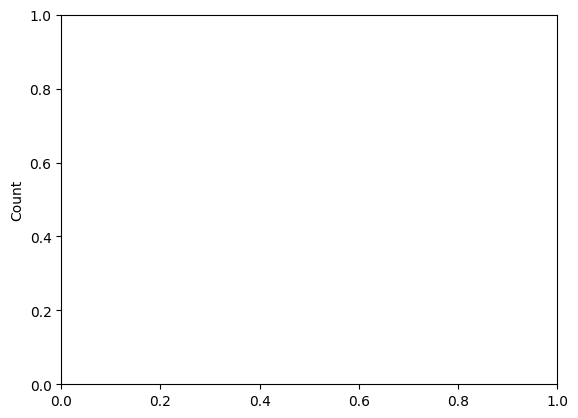

In [ ]:
plt.ylabel("Count")


Text(0.5, 1.0, 'Spam vs Ham Email Count')

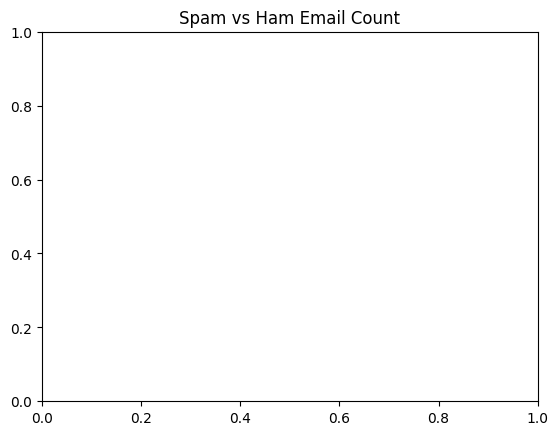

In [ ]:
plt.title("Spam vs Ham Email Count")


In [ ]:
plt.show()


In [ ]:
# --- 2. Train Spam Classifier ---


In [ ]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})  # Convert labels to 0 and 1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')


In [ ]:
X_train_vec = vectorizer.fit_transform(X_train)


In [ ]:
X_test_vec = vectorizer.transform(X_test)


In [ ]:
model = MultinomialNB()


In [ ]:
model.fit(X_train_vec, y_train)


MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_vec)


In [ ]:
# --- 3. Confusion Matrix ---


In [ ]:
cm = confusion_matrix(y_test, y_pred)


In [ ]:
plt.figure(figsize=(5,4))


<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Axes: >

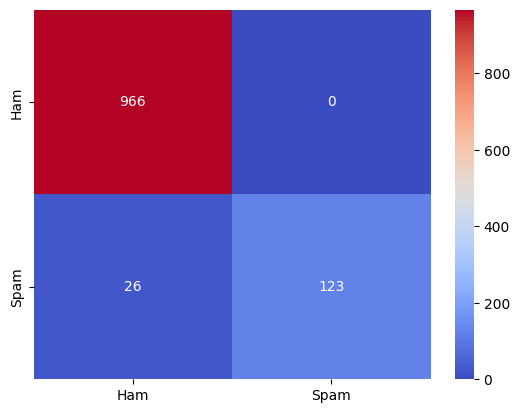

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])


Text(0.5, 0, 'Predicted')

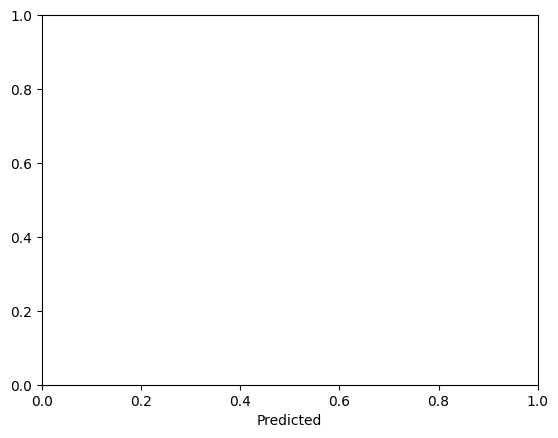

In [ ]:
plt.xlabel("Predicted")


Text(0, 0.5, 'Actual')

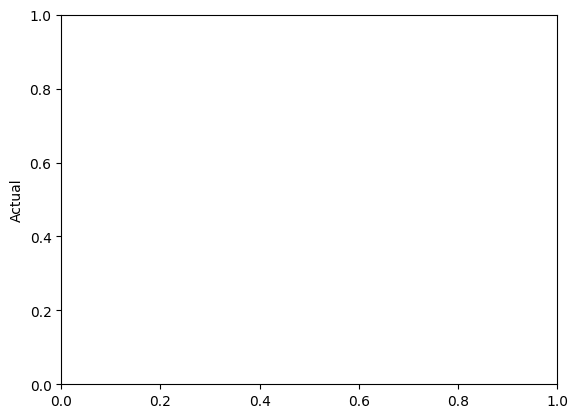

In [ ]:
plt.ylabel("Actual")


Text(0.5, 1.0, 'Confusion Matrix')

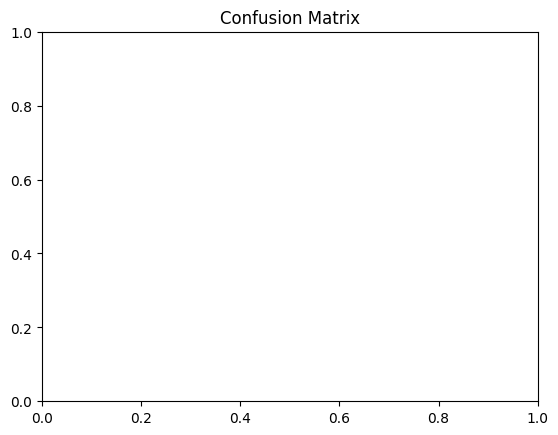

In [ ]:
plt.title("Confusion Matrix")


In [ ]:
plt.show()


In [ ]:
# --- 4. Feature Importance Matrix ---


In [55]:
feature_names = np.array(vectorizer.get_feature_names_out())


In [61]:
importance =  model.predict(X_test_vec)


In [63]:
feature_df = model.predict(X_test_vec)

In [69]:
feature_df = print(type(feature_df))


<class 'numpy.ndarray'>


In [70]:
plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Importance')

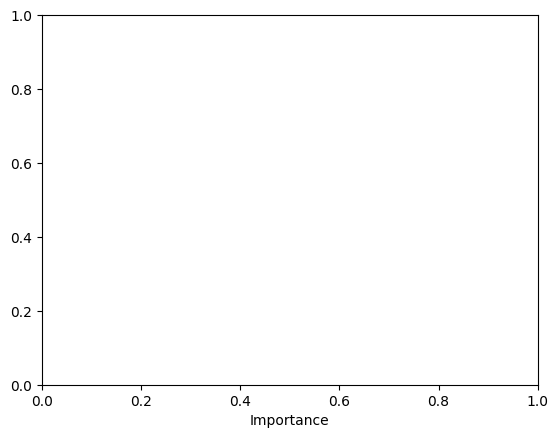

In [75]:
plt.xlabel("Importance")


Text(0, 0.5, 'Top Words')

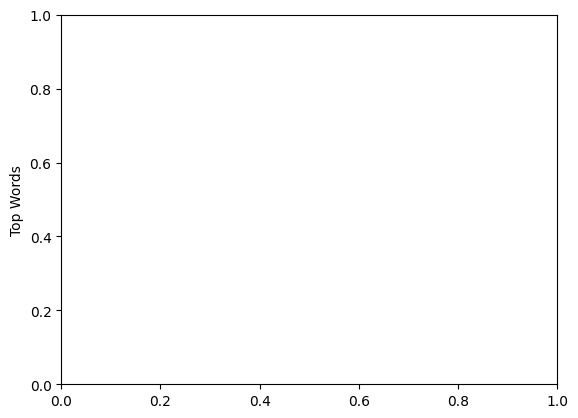

In [76]:
plt.ylabel("Top Words")


Text(0.5, 1.0, 'Top Important Words for Spam Detection')

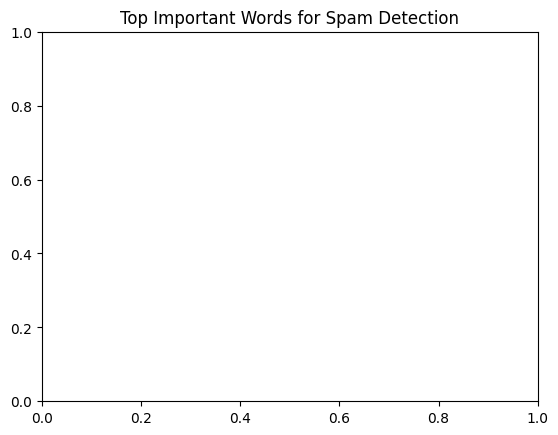

In [77]:
plt.title("Top Important Words for Spam Detection")


In [78]:
plt.show()
